# La catadora de Té

---

Una señora afirma que al probar una taza de té con leche **puede distinguir** qué fue lo primero que se echó en la taza: *el té o la leche*.

¿Cómo podríamos hacer un experimento para determinar si la señora sabe distinguir?

Procuramos realizar un experimento que indique evindencia a favor de la señora.

Para ello, procedemos de la siguiente manera: le damos **n = 12** tazas preparadas de diferentes maneras y contamos el número de veces que la mujer **acierta** el orden en el que fue preparado el té.

Sea X la variable aleatoria que cuenta el ***número de aciertos en los n = 12 ensayos***.

> **1.** ¿Qué **distribución** propone para la variable aleatoria X? ¿Cuáles son los **parámetros** de esta distribución?

Dado que contamos **cantidad de aciertos sobre un total** conocido (n) sin considerar el órden, X será correctamente modelada con una **distribución Binomial** de parámetros **n=12** y probabilidad de acierto **p**:

$X = \text{"# de aciertos en los 12 ensayos"}$

$$X \sim Bin(12, p)$$

Con función de probabilidad puntual:

$$p_X(k) = {n \choose k} * p^{k} * (1-p)^{n-k}$$

> **2.** ¿Cuál es la probabilidad de que acierte **las 12** tazas si responde al azar?
>
>   ¿Le daremos la oportunidad de **equivocarse**?
>
>   ¿Cuántas tazas serán suficientes para que **confiemos** en que la señora tiene la habilidad que ella afirma?
>
>Propongamos diferentes *reglas* que podemos utilizar para decidir que la señora es una entendida en el tema.
>
>* ***Criterio 0***: Determinamos que sabe si **acierta las 12** veces.
>
>* ***Criterio 1***: Determinamos que sabe si **acierta 11 o más** veces.
>
>* ***Criterio 2***: Determinamos que sabe si **acierta 10 o más** veces.
>
>* ***Criterio 3***: Determinamos que sabe si **acierta 9 o más** veces.

Defino función Binomial:

In [342]:
f_binomial <- function(n=12, p=0.5, aciertos){
    k = aciertos
    choose(n, k) * p^k * (1.-p)^(n-k)
}

Calculo Binomial(12, 0.5) para exactamente 12 aciertos de los 12 intentos (Criterio 0)

In [343]:
f_binomial(n=12, p=0.5, aciertos=12)

[1] 0,0002441406

La probabilidad de que acierte las 12 tazas **si responde al azar** es de **0.0244%**: $P(X=12)=2.441 * 10^{-4}$


También podemos interpretarlo como que ***si acierta las 12 tazas***, entonces:

* es muy poco probable (**0.0244%**) de que haya elegido sus respuetas al azar
* muy probablemente (**99.975%**) **NO sea una respuesta al azar**.

> **3.** Supongamos que la señora responde al azar. Para cada uno de los criterios propuestos, calcule la probabilidad de que consideremos que la señora sabe.

Defino eventos:

* $C_{0} = \text{"12 aciertos en los 12 ensayos (Criterio 0)"}$
* $C_{1} = \text{"al menos 11 aciertos en los 12 ensayos (Criterio 1)"}$ 
* $C_{2} = \text{"al menos 10 aciertos en los 12 ensayos (Criterio 2)"}$ 
* $C_{3} = \text{"al menos 9 aciertos en los 12 ensayos (Criterio 3)"}$ 

Calculo probabilidades **para cada evento** a partir de la función de probabilidad puntual de una Binomial (12, 0.5):

$$P(C_i) = P(X \geq 12-i)$$

$$_{i \in \{0,1,2,3\}}$$

$$= \sum_{k=12-i}^{12} p_X(k) $$

$$= \sum_{k=12-i}^{12} {12 \choose k} * 0.5^{k} * 0.5^{12-k}$$

### Criterio 0:

$P(C_0) = P(X \geq 12) = P(X = 12)$

$P(C_0) = p_X(12)$

In [344]:
PX12 = f_binomial(n=12, p=0.5, aciertos=12)

PC0 = PX12
PC0

[1] 0,0002441406

$P(C_0) = {12 \choose 12} * 0.5^{12} * 0.5^0$

$P(C_0) = 0.5^{12} $

$P(C_0) = \frac{1}{4096} \approx 0.0002441$

### Criterio 1:

$P(C_1) = P(X \geq 11)$

$P(C_1) = P(X = 11) + P(X = 12)$

$P(C_1) = p_X(11) + p_X(12)$

In [345]:
PX12 = f_binomial(n=12, p=0.5, aciertos=12)
PX11 = f_binomial(n=12, p=0.5, aciertos=11)

PC1 = PX11 + PX12
PC1

[1] 0,003173828

$P(C_1) = P(C_0) + {12 \choose 11} * 0.5^{11} * 0.5^{1}$

$P(C_1) = P(C_0) + {12 \choose 11} * 0.5^{12}$

$P(C_1) = \frac{1}{4096} + 12 * \frac{1}{4096}$

$P(C_1) = 13 * \frac{1}{4096} \approx 0.003174$

### Criterio 2:

$P(C_2) = p_X(10) + p_X(11) + p_X(12)$

In [346]:
PX12 = f_binomial(n=12, p=0.5, aciertos=12)
PX11 = f_binomial(n=12, p=0.5, aciertos=11)
PX10 = f_binomial(n=12, p=0.5, aciertos=10)

PC2 = PX10 + PX11 + PX12
PC2

[1] 0,01928711

$P(C_2) = P(C_1) + {12 \choose 10} * 0.5^{10} * 0.5^{2}$

$P(C_2) = P(C_1) + {12 \choose 10} * 0.5^{12}$

$P(C_2) = 13 * \frac{1}{4096} + 66 * \frac{1}{4096} $

$P(C_2) = 79 * \frac{1}{4096} \approx 0.01929$

### Criterio 3:

$P(C_2) = p_X(9) + p_X(10) + p_X(11) + p_X(12)$

In [347]:
PX12 = f_binomial(n=12, p=0.5, aciertos=12)
PX11 = f_binomial(n=12, p=0.5, aciertos=11)
PX10 = f_binomial(n=12, p=0.5, aciertos=10)
PX9  = f_binomial(n=12, p=0.5, aciertos=9)

PC3 = PX9 + PX10 + PX11 + PX12
PC3

[1] 0,07299805

$P(C_3) = P(C_2) + {12 \choose 9} * 0.5^{9} * 0.5^{3}$

$P(C_3) = P(C_2) + {12 \choose 9} * 0.5^{12}$

$P(C_3) = 79 * \frac{1}{4096} + 220 * \frac{1}{4096} $

$P(C_3) = 299 * \frac{1}{4096} \approx 0.072998$

### Criterios y Binomial (12, 0.5)

* Calculo todas las probabilidades puntuales de una distribución Binomial (12, 0.5)

In [387]:
bin <- array(dim=12)
for(i in c(1:13)){
    aciertos <- i-1  # indices arrancan en 1, aciertos en 0
    bin[i] <- f_binomial(n=12, p=0.5, aciertos=aciertos)
}

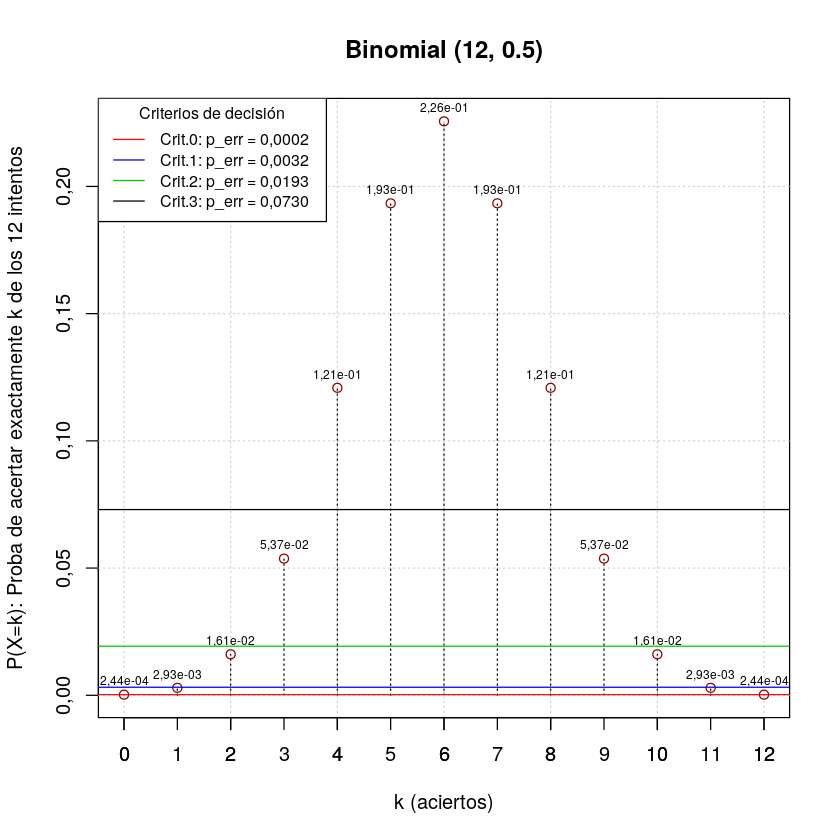

In [391]:
plot(c(0:12), bin, type="h", lty = 3, main="Binomial (12, 0.5)",
                   xlab="k (aciertos)",
                   ylab="P(X=k): Proba de acertar exactamente k de los 12 intentos")
grid()

axis(side=1, c(0:12))
points(c(0:12), bin, pch=1, cex=1, col="dark red")
text(c(0:12), bin+0.005, labels=formatC(bin, format="e", digits=2),
     cex=0.6, font=1)
#Criterios
criterios = c(PC0, PC1, PC2, PC3)
nombres <- c('Crit.0: p_err =','Crit.1: p_err =','Crit.2: p_err =','Crit.3: p_err =')
abline(h=criterios, col=c(2,4,3,1))
legend("topleft", title="Criterios de decisión",
                  legend=paste(nombres, formatC(criterios, format="f", digits=4)),
                  col=c(2,4,3,1), lty=1, cex=0.8)

### Función de distribución Acumulada

#### Probabilidad de acertar COMO MÁXIMO k de los 12 intentos

* Suma probabilidades **desde k=0** hasta k=12 aciertos

In [392]:
acumulada <- numeric(13) # todos ceros
for(i in c(1:13)){
    aciertos <- i-1  # indices arrancan en 1, aciertos en 0
    if(i==1){
        acumulada[i] <- f_binomial(n=12, p=0.5, aciertos=aciertos)
    }
    else{
        acumulada[i] <- acumulada[i-1] + f_binomial(n=12, p=0.5, aciertos=aciertos)
    }
}

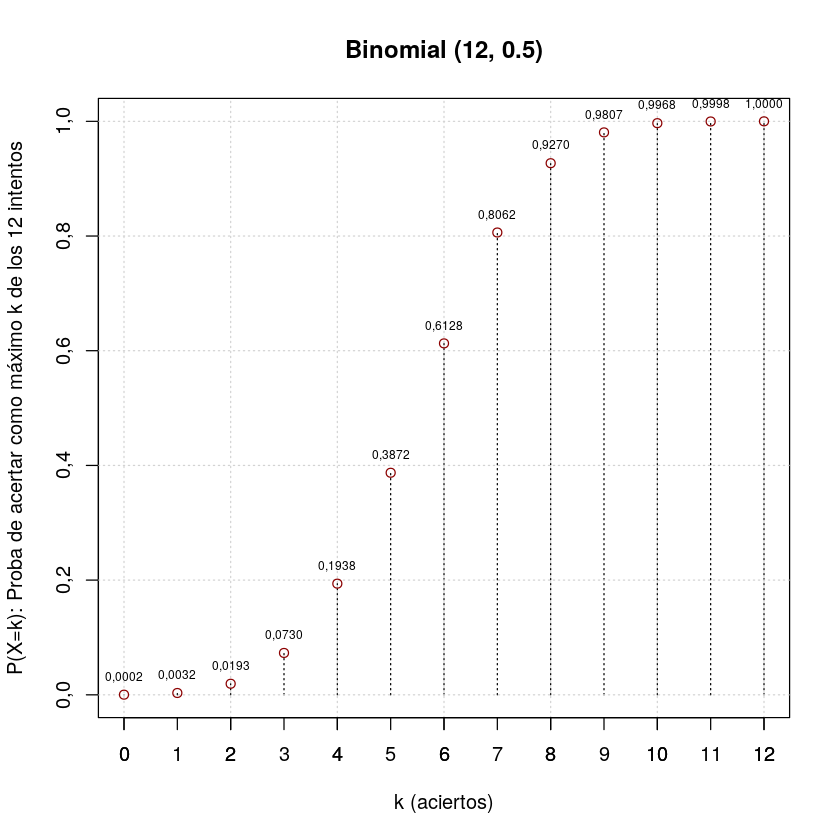

In [393]:
plot(c(0:12), acumulada, type="h", lty = 3, main="Binomial (12, 0.5)",
                  xlab="k (aciertos)", ylab="P(X=k): Proba de acertar como máximo k de los 12 intentos")
grid()
axis(side=1, c(0:12))
points(c(0:12), acumulada , pch=1, cex=1, col="dark red")
text(c(0:12), acumulada+0.03, labels=formatC(acumulada, format="f", digits=4),
     cex=0.6, font=1)

#### Proba de acertar AL MENOS k de los 12 intentos

* Sumo probabilidades **desde k=12** hasta k=0 aciertos

In [394]:
acum_invertida <- numeric(13) # todos ceros
for(i in c(13:1)){
    aciertos <- i-1  # indices arrancan en 1, aciertos en 0
    if(i==13){
        acum_invertida[i] <- f_binomial(n=12, p=0.5, aciertos=aciertos)
    }
    else{
        acum_invertida[i] <- acum_invertida[i+1] + f_binomial(n=12, p=0.5, aciertos=aciertos)
    }
}

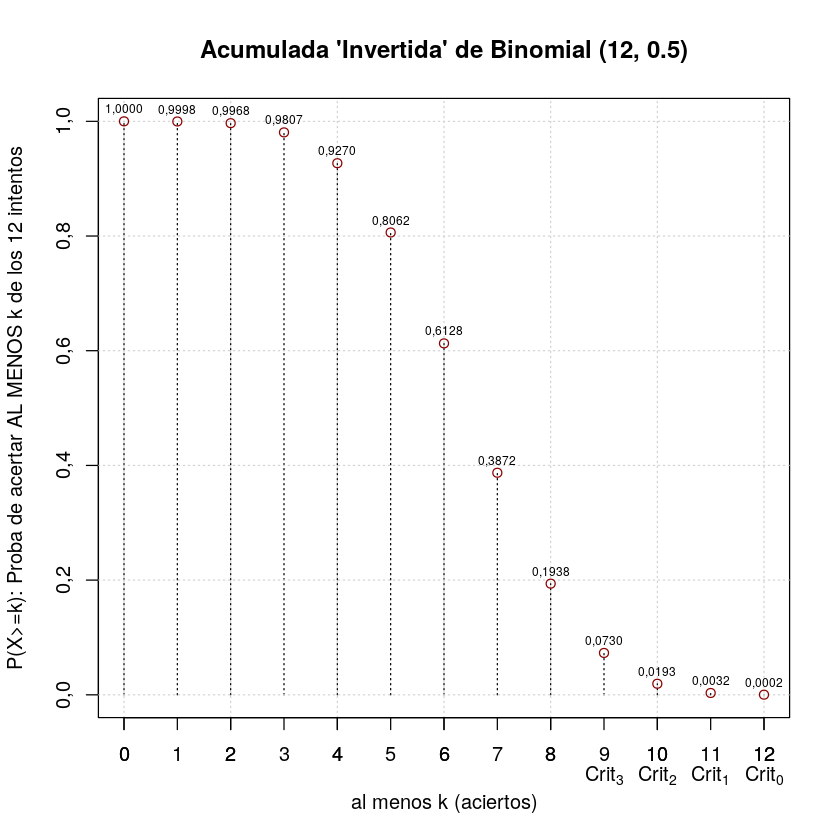

In [395]:
plot(c(0:12), acum_invertida, type="h", lty = 3, main="Acumulada 'Invertida' de Binomial (12, 0.5)",
                  xlab="al menos k (aciertos)", ylab="P(X>=k): Proba de acertar AL MENOS k de los 12 intentos")
grid()
axis(side=1, c(0:12))
points(c(0:12), acum_invertida , pch=1, cex=1, col="dark red")
text(c(0:12), acum_invertida+0.02, labels=formatC(acum_invertida, format="f", digits=4),
     cex=0.6, font=1)
# Criterios:
mtext(expression(Crit[0]), side=1, line=2, at=12)
mtext(expression(Crit[1]), side=1, line=2, at=11)
mtext(expression(Crit[2]), side=1, line=2, at=10)
mtext(expression(Crit[3]), side=1, line=2, at=9)

**Obs:** Uso ***Acumulada 'Invertida'*** pues acumulo probabilidades de derecha a izquierda, orden inverso al de la función de distribución acumulada.

**Notar** que como la función puntual de la Binomial(n, p=***0.5***) es **simétrica** en su esperanza $E[X]=6$, acumular de izquierda a derecha es lo mismo que de derecha a izquierda, y por lo tanto, la acumulada 'invertida' es la misma que la función acumulada usual.

**Notar** que la **simetría** depende de $p=0.5$, que de ser distinto, el sentido de acumulación definiría funciones diferentes (más de ésto en 6.)

> **4.** Que criterio debemos utilizar si queremos que la **probabildad de equivocarnos** al decidir que **sabe cuando en realidad responde al azar** no sea superior al valor 0.02?

Las probabilidades calculadas para cada criterio modelan nuestra confianza sobre cada evento:

Ej:

* Si acierta 12 de 12, nuestra **confianza es muy alta**, pues la probabilidad de que este evento **ocurra al azar es muy baja**.

* Acertar 9 de 12 es **un evento más probable si se actúa al azar**, por lo que **confiamos menos** en que acierte **a causa de** sus poderes, y más en que sea a causa del azar.

In [396]:
X <- data.frame(c('0','1','2','3'), c(PC0,PC1,PC2,PC3), 1-c(PC0,PC1,PC2,PC3))
colnames(X) <- c('Criterio', 'Proba de equivocarnos', 'Confianza')
X

Criterio,Proba de equivocarnos,Confianza
0,"0,0002441406","0,9997559"
1,"0,0031738281","0,9968262"
2,"0,0192871094","0,9807129"
3,"0,0729980469","0,9270020"


Buscamos los criterios que indican una probabilidad **menor o igual a 0.02**:

|Criterio|Proba de equivocarnos|Confianza|
|---|---|---|
|***0***|***0,0002441406***|0,9997559|
|***1***|***0,0031738281***|0,9968262|
|***2***|***0,0192871094***|0,9807129|
|~~3~~|~~0,0729980469~~|~~0,9270020~~|

El criterio 3 resulta demasiado *laxo* para nuestra exigencia.

Podemos elegir entre los criterios 0,1 y 2, siendo 0 el más estricto (muy bajas probabilidades de equivocarnos, pero demasiado exigente) y el criterio 2 el más cercano al margen de error máximo requerido (0.02).

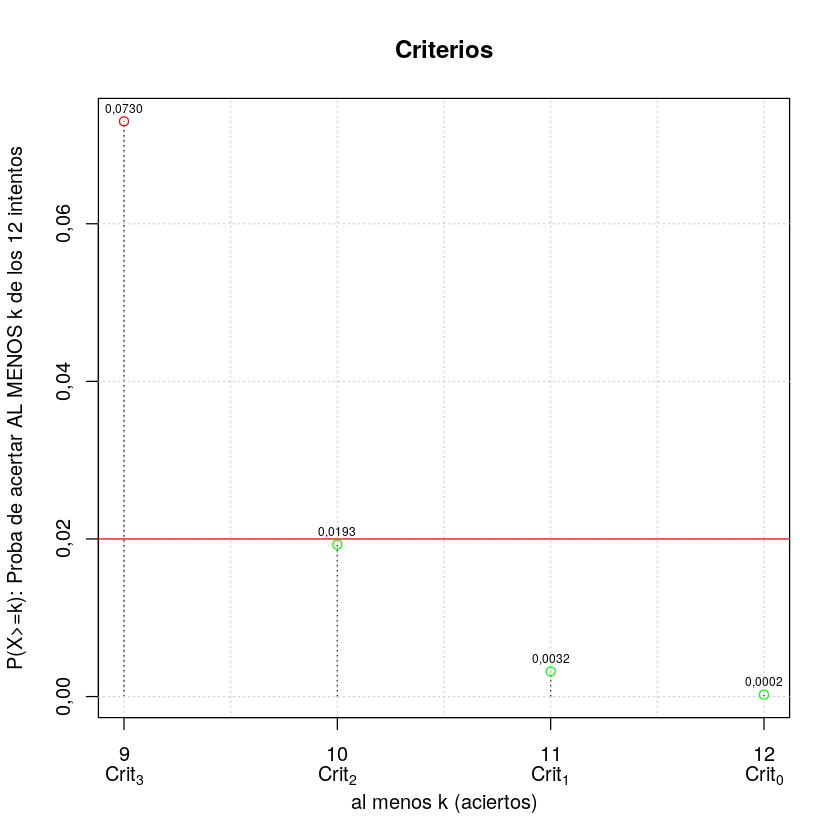

In [397]:
proba_maxima <- 0.02
criterios <- acum_invertida[10:13] # 9 a 12 aciertos
plot(c(9:12), criterios, type="h", lty = 3, xaxt='n',
              main="Criterios",
              xlab="al menos k (aciertos)", ylab="P(X>=k): Proba de acertar AL MENOS k de los 12 intentos")
grid()
axis(side=1, c(9:12))
points(c(9:12), criterios , pch=1, cex=1, col=c('red','green','green','green'))
text(c(9:12), criterios+0.0015, labels=formatC(criterios, format="f", digits=4),
     cex=0.6, font=1)
abline(h=proba_maxima, col='red')
# Criterios:
mtext(expression(Crit[0]), side=1, line=2, at=12)
mtext(expression(Crit[1]), side=1, line=2, at=11)
mtext(expression(Crit[2]), side=1, line=2, at=10)
mtext(expression(Crit[3]), side=1, line=2, at=9)

> **5.** Supongamos que la señora responde bien en 10 ocaciones.
>
>   i) ¿Cuál es el criterio más exigente que nos permite decir que la señora sabe?
>
>   ii) ¿Cuál es la probabilidad de error de dicho criterio cuando en realidad responde al azar?
>
>   iii) ¿Cuál es la probabilidad de observar un valor tan o más grande que el observado, asumiendo que responde al azar?

i) Calculo probabilidad de 10 aciertos suponiendo que responde al azar:

In [398]:
aciertos = 10
f_binomial(n=12, p=0.5, aciertos=aciertos)

[1] 0,01611328

La **probabilidad de equivocarnos al decidir** que la señora sabe es de 1.61%

Los criterios que **nos permiten decidir que la señora sabe** son aquellos cuyos márgenes de error estén **por encima** de 1.61%:

|Criterio|Proba de equivocarnos|Confianza|
|---|---|---|
|~~0~~|~~0,0002441406~~|~~0,9997559~~|
|~~1~~|~~0,0031738281~~|~~0,9968262~~|
|***2***|***0,0192871094***|0,9807129|
|***3***|***0,0729980469***|0,9270020|

(Los criterios 0 y 1 consideran que la señora es una farsa si solo adivina 10 de las 12)

Entre los criterios 2 y 3, elijo el más exigente: el **Criterio 2**.

ii) La **probabilidad de error** del criterio 2 será la misma **independientemente de lo que acierte la señora**.

|Criterio|Proba de equivocarnos|Confianza|
|---|---|---|
|***2***|***0,0192871094***|0,9807129|

iii) Pide la probabilidad de $P(X \geq 10)$, siendo 10 el valor observado.

Anteriormente definimos:

$\text{Criterio2} = p_X(10)+p_X(11)+p_X(12) = P(X \geq 10)$

Por lo que *la probabilidad de observar un valor tan o más grande que el observado, asumiendo que responde al azar* **será la misma que la probabilidad de equivocarnos con el criterio 10**:

|Criterio|Proba de equivocarnos|$$p_X(10)+p_X(11)+p_X(12)$$|Confianza|
|---|---|---|---|
|***2***|***0,0192871094***|***0,0192871094***|0,9807129|

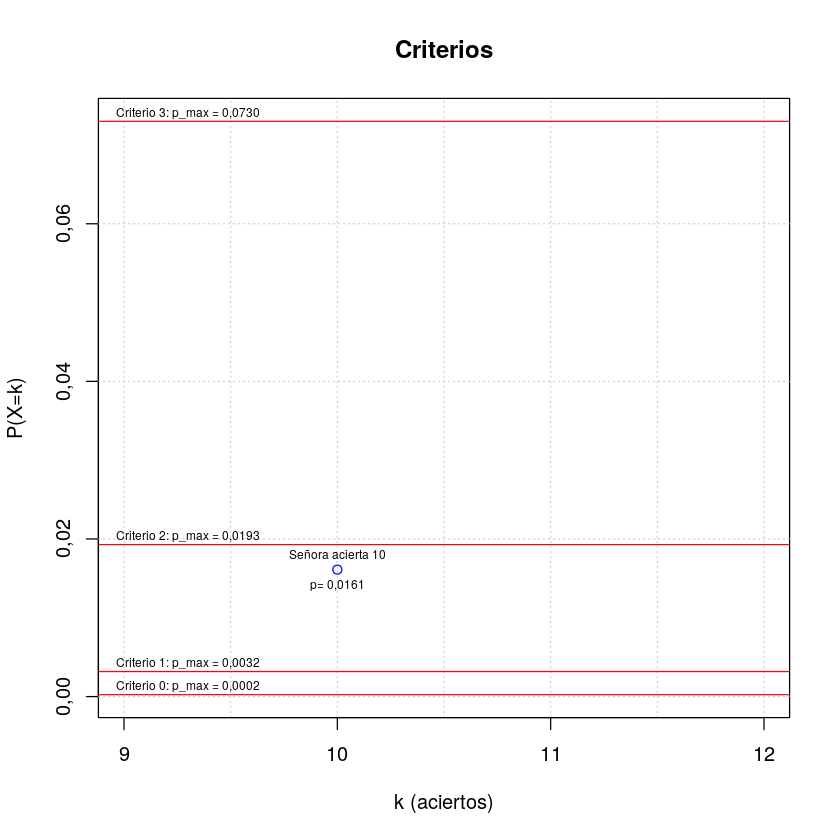

In [399]:
proba_10 <- f_binomial(n=12, p=0.5, aciertos=10)
criterios <- acum_invertida[10:13] # 9 a 12 aciertos
plot(c(9:12), criterios, type="h", lty = 0, xaxt='n',
              main="Criterios",
              xlab="k (aciertos)", ylab="P(X=k)")
grid()
axis(side=1, c(9:12))
points(c(9:12), criterios , pch=1, cex=0, col=c('red','green','green','green'))

# Criterios:
nombres <- c('Criterio 3: p_max =','Criterio 2: p_max =','Criterio 1: p_max =','Criterio 0: p_max =')
text(rep(9.3,4), criterios+0.001, labels=paste(nombres, formatC(criterios, format="f", digits=4)),
     cex=0.6, font=1)

abline(h=criterios, col='red')
points(c(10), proba_10, col='blue')
text(c(10), proba_10+0.002, labels=c('Señora acierta 10'),
     cex=0.6, font=1)
text(c(10), proba_10-0.002, labels=paste('p=',formatC(proba_10, format="f", digits=4)),
     cex=0.6, font=1)

> **6.** Si en realidad la señora tiene un verdadero don y **acierta al orden** en que se pone la leche y el té **con probabilidad igual a 0.8**.
>
>   Para cada uno de los criterios propuestos, calcule la probabilidad de que consideremos que la señora sabe.
>
>   Y si la **probabilidad de acertar con el orden es 0.9**, ¿**cómo cambia** la probabilidad de decidir que la señora sabe con cada uno de los criterios?

### Binomial (12, 0.8)

**Notar** que **la esperanza** se desplaza hacia el **extremo de mayores aciertos**, dejando de ser una función simétrica.

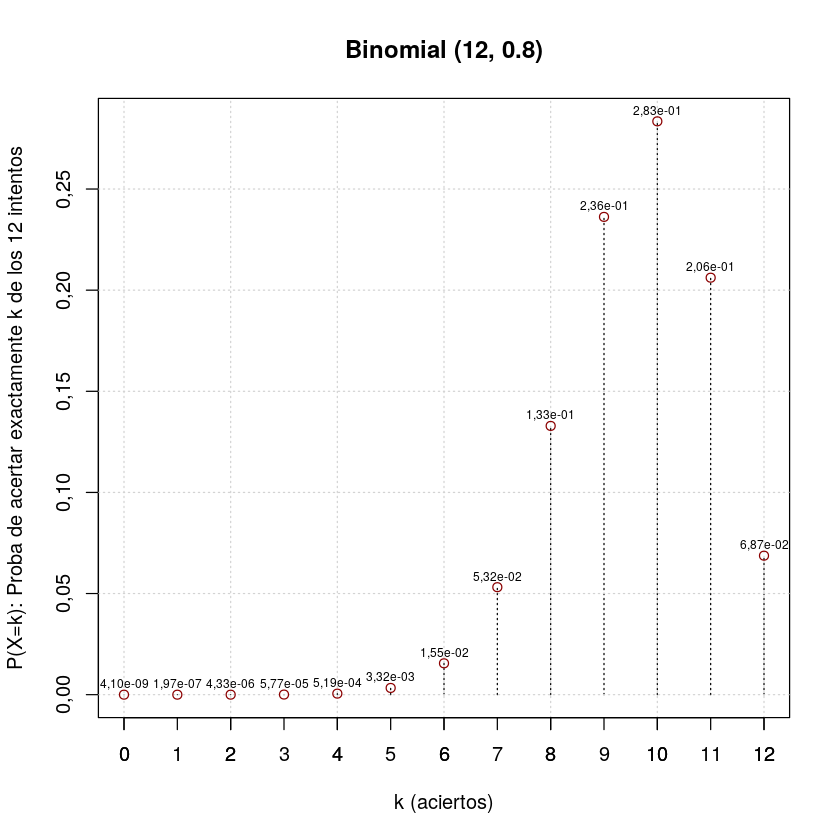

In [400]:
# Armo vector de todas las posibles probabilidades puntuales
bin <- array(dim=12)
for(i in c(1:13)){
    aciertos <- i-1  # indices arrancan en 1, aciertos en 0
    bin[i] <- f_binomial(n=12, p=0.8, aciertos=aciertos)
}
# Plot del vector de probabilidades
plot(c(0:12), bin, type="h", lty = 3, main="Binomial (12, 0.8)",
                   xlab="k (aciertos)",
                   ylab="P(X=k): Proba de acertar exactamente k de los 12 intentos")
grid()
axis(side=1, c(0:12))
points(c(0:12), bin, pch=1, cex=1, col="dark red")
text(c(0:12), bin+0.005, labels=formatC(bin, format="e", digits=2),
     cex=0.6, font=1)


### Criterios

Calculo probabilidades con $p=0.8$

In [401]:
PX12 <- f_binomial(n=12, p=0.8, aciertos=12)
PX11 <- f_binomial(n=12, p=0.8, aciertos=11)
PX10 <- f_binomial(n=12, p=0.8, aciertos=10)
PX9  <- f_binomial(n=12, p=0.8, aciertos=9)

In [402]:
PC0 <- PX12
PC1 <- PX11 + PX12
PC2 <- PX10 + PX11 + PX12
PC3 <- PX9  + PX10 + PX11 + PX12
criterios <- data.frame(c(0:3), c(PC0,PC1,PC2,PC3), 1-c(PC0,PC1,PC2,PC3))
colnames(criterios) <- c('Criterio', 'Proba de equivocarnos', 'Confianza')
criterios

Criterio,Proba de equivocarnos,Confianza
0,"0,06871948","0,9312805"
1,"0,27487791","0,7251221"
2,"0,55834575","0,4416543"
3,"0,79456895","0,2054311"


Muy distinto a los valores obtenidos suponiendo que la señora actuaba al azar, ahora con muy pocos errores, **la probabilidad de equivocarnos aumenta considerablemente**.

Podemos escribirlo como una implicación:

> *si **DEBERÍA** acertar en el 80%, pero **OBSERVAMOS** que acierta menos $\Rightarrow$ **DUDAMOS** de que nuestra afirmación A PRIORI (la del 80%) sea correcta*
>
> $$P(X, Y) = P(Y|X).P(X)$$
>
> ![not-sure-if-bayes](https://media2.giphy.com/media/5b5OU7aUekfdSAER5I/giphy.gif?cid=790b761103d3b36a6850d63ad3175bed54ca9ab5f69da7c8&rid=giphy.gif)

**TODO:** Chequear la relación con proba Bayesiana.

### Binomial (12, 0.9)

**Notar** como **la esperanza** se desplaza aún más hacia el **extremo de mayores aciertos**.

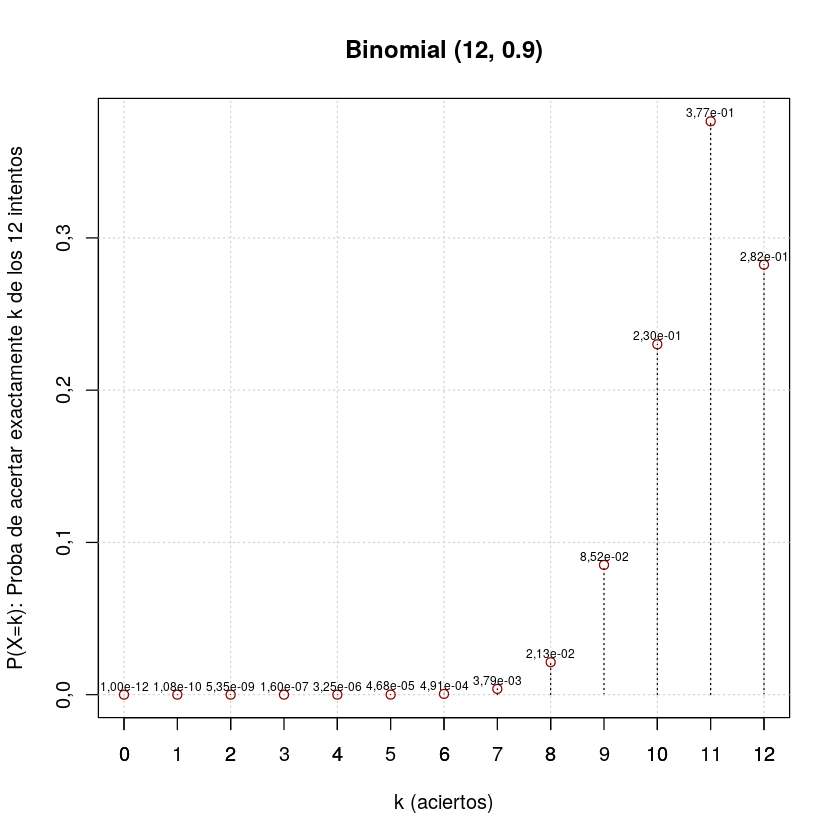

In [403]:
# Armo vector de todas las posibles probabilidades puntuales
bin <- array(dim=12)
for(i in c(1:13)){
    aciertos <- i-1  # indices arrancan en 1, aciertos en 0
    bin[i] <- f_binomial(n=12, p=0.9, aciertos=aciertos)
}
# Plot del vector de probabilidades
plot(c(0:12), bin, type="h", lty = 3, main="Binomial (12, 0.9)",
                   xlab="k (aciertos)",
                   ylab="P(X=k): Proba de acertar exactamente k de los 12 intentos")
grid()
axis(side=1, c(0:12))
points(c(0:12), bin, pch=1, cex=1, col="dark red")
text(c(0:12), bin+0.005, labels=formatC(bin, format="e", digits=2),
     cex=0.6, font=1)

### Criterios

Calculo probabilidades con $p=0.9$

In [404]:
PX12 <- f_binomial(n=12, p=0.9, aciertos=12)
PX11 <- f_binomial(n=12, p=0.9, aciertos=11)
PX10 <- f_binomial(n=12, p=0.9, aciertos=10)
PX9  <- f_binomial(n=12, p=0.9, aciertos=9)

In [405]:
PC0 <- PX12
PC1 <- PX11 + PX12
PC2 <- PX10 + PX11 + PX12
PC3 <- PX9  + PX10 + PX11 + PX12
criterios <- data.frame(c(0:3), c(PC0,PC1,PC2,PC3), 1-c(PC0,PC1,PC2,PC3))
colnames(criterios) <- c('Criterio', 'Proba de equivocarnos', 'Confianza')
criterios

Criterio,Proba de equivocarnos,Confianza
0,"0,2824295","0,71757046"
1,"0,6590023","0,34099775"
2,"0,8891300","0,11086998"
3,"0,9743625","0,02563747"


Similar a $p=0.8$, nuestra **confianza** en la decisión que tomemos **se reduce** en gran medida con **muy pocos fracasos observados**.

### Plots: Criterios y Acumuladas 'Invertidas'

**Observar** como ***esperamos*** que acierte **al menos 7** con probabilidad 98%, de forma que al establecer una probabilidad $p=0.8$, ***esperamos*** grandes resultados de parte de la señora.

### Binomial(12, 0.8)

In [406]:
acum_invertida <- numeric(13) # todos ceros
for(i in c(13:1)){
    aciertos <- i-1  # indices arrancan en 1, aciertos en 0
    if(i==13){
        acum_invertida[i] <- f_binomial(n=12, p=0.8, aciertos=aciertos)
    }
    else{
        acum_invertida[i] <- acum_invertida[i+1] + f_binomial(n=12, p=0.8, aciertos=aciertos)
    }
}

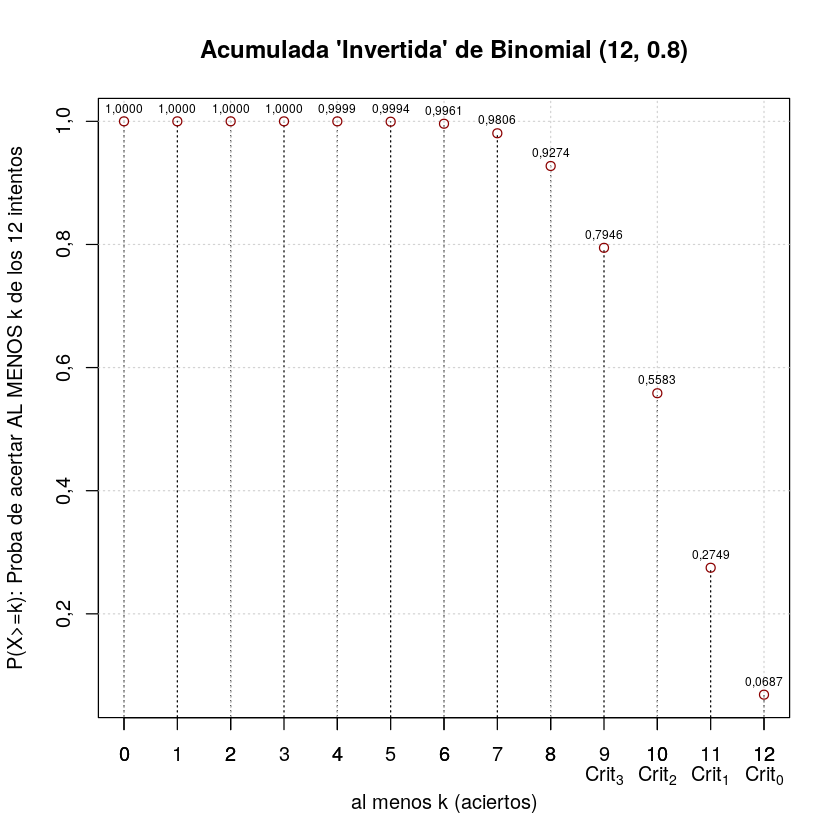

In [407]:
plot(c(0:12), acum_invertida, type="h", lty = 3, main="Acumulada 'Invertida' de Binomial (12, 0.8)",
                  xlab="al menos k (aciertos)", ylab="P(X>=k): Proba de acertar AL MENOS k de los 12 intentos")
grid()
axis(side=1, c(0:12))
points(c(0:12), acum_invertida , pch=1, cex=1, col="dark red")
text(c(0:12), acum_invertida+0.02, labels=formatC(acum_invertida, format="f", digits=4),
     cex=0.6, font=1)
# Criterios:
mtext(expression(Crit[0]), side=1, line=2, at=12)
mtext(expression(Crit[1]), side=1, line=2, at=11)
mtext(expression(Crit[2]), side=1, line=2, at=10)
mtext(expression(Crit[3]), side=1, line=2, at=9)

### Binomial(12, 0.9)

In [408]:
acum_invertida <- numeric(13) # todos ceros
for(i in c(13:1)){
    aciertos <- i-1  # indices arrancan en 1, aciertos en 0
    if(i==13){
        acum_invertida[i] <- f_binomial(n=12, p=0.9, aciertos=aciertos)
    }
    else{
        acum_invertida[i] <- acum_invertida[i+1] + f_binomial(n=12, p=0.9, aciertos=aciertos)
    }
}

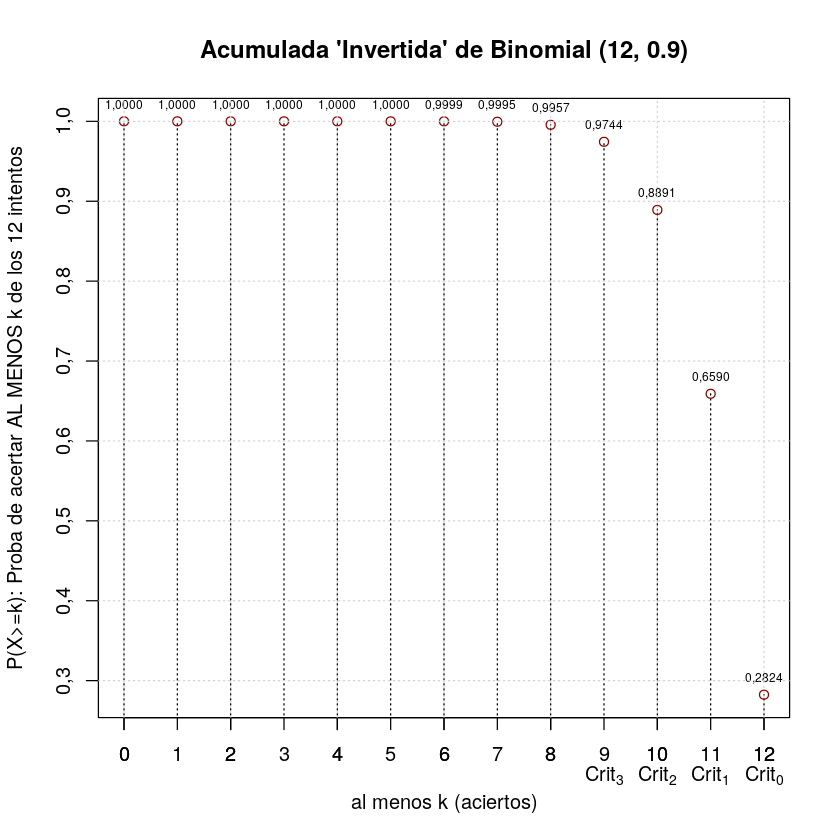

In [409]:
plot(c(0:12), acum_invertida, type="h", lty = 3, main="Acumulada 'Invertida' de Binomial (12, 0.9)",
                  xlab="al menos k (aciertos)", ylab="P(X>=k): Proba de acertar AL MENOS k de los 12 intentos")
axis(side=1, c(0:12))
points(c(0:12), acum_invertida , pch=1, cex=1, col="dark red")
text(c(0:12), acum_invertida+0.02, labels=formatC(acum_invertida, format="f", digits=4),
     cex=0.6, font=1)
# Criterios:
mtext(expression(Crit[0]), side=1, line=2, at=12)
mtext(expression(Crit[1]), side=1, line=2, at=11)
mtext(expression(Crit[2]), side=1, line=2, at=10)
mtext(expression(Crit[3]), side=1, line=2, at=9)
grid()

___

# Lady tasting tea
---

From Wikipedia, the free encyclopedia

> *In the design of experiments in statistics, the lady tasting tea is a randomized experiment devised by Ronald Fisher and reported in his book The Design of Experiments (1935).*
>
> *The experiment is the original exposition of Fisher's notion of a null hypothesis, which is **"never proved or established, but is possibly disproved, in the course of experimentation"**.*

https://en.wikipedia.org/wiki/Lady_tasting_tea